In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data() # Загрузка данных MNIST

In [3]:
X_train.shape #60 000 изображений, каждое из которых представлено матрицей значений 28 × 28

(60000, 28, 28)

In [4]:
y_train.shape


(60000,)

In [5]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

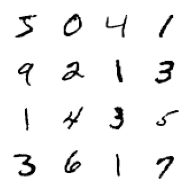

In [6]:
plt.figure(figsize=(2,2))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

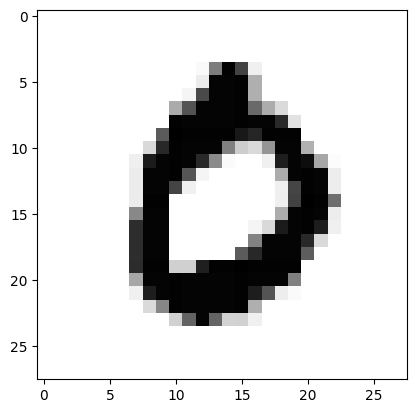

In [9]:
plt.imshow(X_valid[3], cmap='Greys')

In [10]:
y_valid[0]

7

In [11]:
y_valid[0:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=uint8)

In [12]:
#Предварительная обработка данных
#reshape() преобразуем изображения размером 28 × 28 пикселов в одно- мерные массивы с 784 элементами в каждом
#Преобразование двумерных изображений в одномерные массивы
# astype('float32'), чтобы преобразовать целочис- ленные значения темных пикселов в значения с плавающей точкой одинарной точности
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
#делим чтобы отобразить их в диапазоне значений от 0 до 
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# Преобразование целочисленных меток в прямой код
#всего 10 возможных рукописных цифр
# to_categorical из библиотеки Keras, преобразующая метки в обучающем и проверочном наборах данных из целочисленного представления в прямой код.
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [17]:
#ПРОЕКТИРОВАНИЕ АРХИТЕКТУРЫ НЕЙРОННОЙ СЕТИ

In [18]:
model = Sequential() #тип моделей получил потому, что каждый слой сети последова- тельно (sequential) передает информацию только следующему слою
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
# чтобы определить атрибуты скрытого слоя сети (64 искусственных нейрона типа sigmoid в полносвязанном слое, который в свою очередь создается методом Dense())2,
#а также форму входного слоя (одномерный массив с длиной 784).
model.add(Dense(10, activation='softmax'))
#10 искусственных нейронов типа softmax, соответствующих 10 вероятностям (по одной на каждую из 10 воз- можных цифр),
#через которые сеть будет выводить результат после передачи ей изображения рукописной цифры.


/Users/danaosovtsova/work/deeplearning/digit-recognition/Распознание цифр/myenv39/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-29 21:04:41.647270: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-29 21:04:41.647287: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-29 21:04:41.647291: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-29 21:04:41.647305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-29 21:04:41.647314: I tensorflow/core/common_runtime/plu

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
(64*784)

50176

In [21]:
(64*784)+64

50240

In [22]:
(10*64)+10

650

In [25]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [26]:
# Обучение неглубокой нейронной сети с использованием Keras
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))
#Методfit()объектаmodelзапускаетобучениесетинаобучающихизобра- жениях X_train — входных данных — и связанных с ними метках y_train— желаемых выходных данных.
#Также fit() дает возможность оценивать точность прогнозов сети в ходе ее обучения, 
#для чего достаточно передать проверочные данные X_valid и y_valid в аргументе validation_data.
#epochs=200 чтобы перебрать все изображения 200 раз
#verbose=1 для подробного отчета об обучении

Epoch 1/200


2024-12-29 21:06:16.544740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1154 - loss: 0.0921 - val_accuracy: 0.1389 - val_loss: 0.0915
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1434 - loss: 0.0912 - val_accuracy: 0.1687 - val_loss: 0.0907
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1734 - loss: 0.0905 - val_accuracy: 0.1869 - val_loss: 0.0902
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1927 - loss: 0.0899 - val_accuracy: 0.2261 - val_loss: 0.0897
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2395 - loss: 0.0895 - val_accuracy: 0.2738 - val_loss: 0.0893
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2786 - loss: 0.0891 - val_accuracy: 0.2974 - val_loss: 0.0889
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2958 - loss: 0.0888 - val_accuracy: 0.3058 - val_loss: 0.0886
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3027 - loss: 0.0884 - val_accuracy: 0.3100

In [27]:
#классифицировать изображения из коллекции MNIST.

In [28]:
model.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.0294


[0.02657502144575119, 0.8708999752998352]